# Análise exploratória de dados preliminar

Arquivo enviado todo mês pela ECT no formato Febraban (360) contendo cinco tipos de registros:
    A - Cabeçalho
    B - Movimentos
    C - Créditos
    D - Débitos 
    Z - Rodapé (Totalizadores)


In [290]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc as db
from decimal import Decimal

In [291]:
#Metadados da extração
identificador_carga = 1
conta = 'Correio' #Correio, Rede Lógica, Frotas, Telefonia, etc
fonte = 'Fatura - Arquivo Febraban - 360 - A - Cabeçalho B - Movimentos C - Créditos D - Débitos Z - Rodapé (Totalizadores)' #Faura, banco de dados, web service, Boa Vista, etc
proprietario = 'Correios'
periodicidade = 'mensal' #pode ser anual, semestral ou mensal, em casos de muita movimentação
periodo = '2017-01'
observacoes = 'Verificar envio do arquivo com Felipe lá pelo dia 10/15 de cada mês'
url_extracao = '' #caso arquivo seja extraído por download
tipo_banco_dados_extracao = '' #caso seja estraído via banco de dados
nome_database ='' #caso seja extraído via banco de dados
nome_tabela = '' #caso seja extraído via banco de dados
ip_extracao = '' #caso seja extraído via banco de dados
porta_extracao = '' #caso seja extraído via banco de dados
credenciais = '' #usuario e senha caso seja extraído via banco de dados
script_extracao = '' #caso seja extraído via banco de dados
usuario_extracao = '' #caso seja extraído via banco de dados
data_extracao = '2018/06/14'
#Metadados da análise
usuario_analise_preliminar = 'Robson Junqueira da Rosa' 
data_analise_preliminar = '2018/06/18'
arquivo = "Correio-2017-01.txt"
formato_arquivo = 'txt' #excel, txt, csc, etc
localizacao_arquivo = 'V:\BI_COMAC\Dados\Brutos\Correios'

In [292]:
count_a = 0
count_b = 0
count_c = 0
count_d = 0
count_z = 0

In [293]:
#Estabelece conexão com o banco de dados
database = db.connect('DRIVER={MySQL ODBC 8.0 ANSI Driver};SERVER=localhost;DATABASE=sea_lake; Uid=root;Pwd=@Fpolis18;OPTION=3;')
cursor = database.cursor()
#Criar os inserts para cada tipo de registro
query_a = """INSERT INTO correio_fatura_tipo_a (numero_sequencial_registro, codigo_registro, mes_fatura, ano_fatura, numero_fatura, numero_contrato, numero_centro_custo, cnpj, codigo_barras, filler_a) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"""
query_b = """INSERT INTO correio_fatura_tipo_b (numero_sequencial_registro, codigo_registro, mes_fatura, ano_fatura, numero_lancamento, numero_cartao, data_postagem, descricao_servico, numero_documento, numero_lote, servico_adicional, numero_destino, numero_unidade_postagem, unidade_postagem, peso, quantidade, valor_unitario, valor_desconto, valor_liquido, nota_fiscal_cliente, codigo_servico_ect, responsavel_cartao, numero_objeto, filler_b) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"""
query_c = """INSERT INTO correio_fatura_tipo_c (numero_sequencial_registro, codigo_registro, mes_fatura, ano_fatura, numero_lancamento_credito, descricao_credito, valor_credito_original, valor_credito_corrigido, codigo_operacao_ect, filler_c) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"""
query_d = """INSERT INTO correio_fatura_tipo_d (numero_sequencial_registro, codigo_registro, mes_fatura, ano_fatura, descricao_debito, valor_debito, codigo_operacao_ect, filler_d) VALUES (?, ?, ?, ?, ?, ?, ?, ?)"""
query_z = """INSERT INTO correio_fatura_tipo_z (numero_sequencial_registro, codigo_registro, mes_fatura, ano_fatura, quantidade_tipo_b, quantidade_tipo_c, valor_total_lancamentos_debitos, valor_total_creditos_corrigidos, valor_total_outros_debitos, valor_total_outros_creditos, valor_total_fatura, filler_z) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"""
query_carga = """INSERT INTO carga (identificador_carga, conta, fonte, proprietario, periodicidade, periodo, formato_arquivo, localizacao_arquivo, observacoes, url_extracao, tipo_banco_dados_extracao, nome_database, nome_tabela, ip_extracao, porta_extracao, credenciais, script_extracao, usuario_extracao, data_extracao, usuario_analise_preliminar, data_analise_preliminar) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"""

In [294]:
#Ler o arquivo txt e converter em csv
#"Correio-2017-01.txt" - ok
#"Correio-2017-02.txt" - ok
#"Correio-2017-03.txt" - ok
#"Correio-2017-04.txt" - ok
#"Correio-2017-05.txt" - ok
#"Correio-2017-06.txt" - ok
#"Correio-2017-07.txt" - ok
#"Correio-2017-08.txt" - ok
#"Correio-2017-09.txt" - ok
#"Correio-2017-10.txt" - ok
#"Correio-2017-11.txt" - ok
#"Correio-2017-12.txt" - ok
#"Correio-2018-01.txt" - ok
#"Correio-2018-02.txt" - ok
#"Correio-2018-03.txt" - ok
#"Correio-2018-04.txt" - ok
#"Correio-2018-05.txt" - ok
file = open(arquivo, 'r') #, encoding= "utf8" --- apenas para os arquivos de 2018

In [295]:
for line in file: 
    numero_sequencial_registro = int(line[0 : 7]) #NuSeq
    codigo_registro = str(line[7]) #CodReg
    #Cabeçalho
    if (codigo_registro == "A"):
        count_a = count_a + 1
        mes_fatura = str(line[8 : 10]) #A_03
        ano_fatura = str(line[10 : 14]) #A_04
        numero_fatura = str(line[14 : 26]) #A_05
        numero_contrato = line[26 : 38] #A_06
        numero_centro_custo = line[38 : 47] #A_07
        cnpj = line[47 : 61] #A_08 
        codigo_barras = line[61 : 105] #A_09
        filler_a = line[105 : 361] #A_10
        values = (numero_sequencial_registro, codigo_registro, mes_fatura, ano_fatura, numero_fatura, numero_contrato, numero_centro_custo, cnpj, codigo_barras, filler_a)
        #cursor.execute(query_a, values)
    #Movimentos
    if (codigo_registro == "B"):
        count_b = count_b + 1
        numero_lancamento = line[8: 27] #B_03
        numero_cartao = line[27: 39] #B_04
        data_postagem = line [39 : 49] #B_05
        descricao_servico = line[49 : 99] #B_06
        numero_documento = line[99 : 119] #B_07
        numero_lote =line[119 : 127] #B_08
        servico_adicional = line[127 : 135] #B_09
        numero_destino = line[135 : 143] #B_10
        numero_unidade_postagem = line[143 : 153] #B_11
        unidade_postagem = line[153 : 203] #B_12
        peso = line[203 : 211] #B_13
        quantidade = line[211 : 219] #B_14
        valor_unitario = Decimal(line[219 : 228]) #B_15
        valor_desconto = Decimal(line[228 : 237]) #B_16
        valor_liquido = Decimal(line[237: 246]) #B_17
        nota_fiscal_cliente = line[246 : 261] #B_18
        codigo_servico_ect = line[261 : 266] #B_19
        responsavel_cartao = line[266 : 336] #B_20
        numero_objeto = line[336 : 349] #B_21
        filler_b = line[349 : 361] #B_22
        values = (numero_sequencial_registro, codigo_registro, mes_fatura, ano_fatura, numero_lancamento, numero_cartao, data_postagem, descricao_servico, numero_documento, numero_lote, servico_adicional, numero_destino, numero_unidade_postagem, unidade_postagem, peso, quantidade, valor_unitario / 100, valor_desconto / 100, valor_liquido / 100, nota_fiscal_cliente, codigo_servico_ect, responsavel_cartao, numero_objeto, filler_b)
        #cursor.execute(query_b, values)
    #Créditos
    if (codigo_registro == "C"):
        count_c = count_c + 1
        numero_lancamento_credito = line[8 : 27] #C_03
        descricao_credito = line[27 : 127] #C_04
        valor_credito_original = Decimal(line[127 : 136]) #C_05
        valor_credito_corrigido = Decimal(line[136 : 145]) #C_06
        codigo_operacao_ect = line[145 : 148] #C_07
        filler_c = line[148 : 361] #C_08
        values = (numero_sequencial_registro, codigo_registro, mes_fatura, ano_fatura, numero_lancamento_credito, descricao_credito, valor_credito_original / 100, valor_credito_corrigido / 100, codigo_operacao_ect, filler_c)
        #cursor.execute(query_c, values)
    #Débitos
    if (codigo_registro == "D"):
        count_d = count_d + 1
        descricao_debito = line[8 : 108] #D_03
        valor_debito = Decimal(line[108 : 117]) #D_04
        codigo_operacao_ect = line[117 : 120] #D_05
        filler_d = line[120 : 361] #D_06
        values = (numero_sequencial_registro, codigo_registro, mes_fatura, ano_fatura, descricao_debito, valor_debito / 100, codigo_operacao_ect, filler_d)
        #cursor.execute(query_d, values)
    #Rodapé
    if (codigo_registro == "Z"):
        count_z = count_z + 1
        quantidade_tipo_b = line[8 : 15] #Z_03
        quantidade_tipo_c = line[15 : 22] #Z_04
        valor_total_lancamentos_debitos = Decimal(line[22 : 37]) #Z_05
        valor_total_creditos_corrigidos = Decimal(line[37 : 52]) #Z_06
        valor_total_outros_debitos = Decimal(line[52 : 67]) #Z_07
        valor_total_outros_creditos = Decimal(line[67: 82]) #Z_08
        valor_total_fatura = Decimal(line[82 : 97]) #Z_09
        filler_z = line[97 : 361] #Z_10
        values = (numero_sequencial_registro, codigo_registro, mes_fatura, ano_fatura, quantidade_tipo_b, quantidade_tipo_c, valor_total_lancamentos_debitos / 100, valor_total_creditos_corrigidos / 100, valor_total_outros_debitos / 100, valor_total_outros_creditos / 100, valor_total_fatura / 100, filler_z)
        #cursor.execute(query_z, values)

In [296]:
values = (identificador_carga, conta, fonte, proprietario, periodicidade, periodo, formato_arquivo, localizacao_arquivo, observacoes, url_extracao, tipo_banco_dados_extracao, nome_database, nome_tabela, ip_extracao, porta_extracao, credenciais, script_extracao, usuario_extracao, data_extracao, usuario_analise_preliminar, data_analise_preliminar)
print (values)
cursor.execute(query_carga, values)  
print (cursor.execute)
cursor.close()
database.commit()
database.close()
print (count_a, count_b, count_c, count_d, count_z)
quantidade_tipo_d = int(numero_sequencial_registro) - int(quantidade_tipo_b) - int(quantidade_tipo_c) - 2 #Tipo A e Tipo Z
print ('1', quantidade_tipo_b, quantidade_tipo_c, '0', quantidade_tipo_d, '1'  )
file.close()

(1, 'Correio', 'Fatura - Arquivo Febraban - 360 - A - Cabeçalho B - Movimentos C - Créditos D - Débitos Z - Rodapé (Totalizadores)', 'Correios', 'mensal', '2017-01', 'txt', 'V:\\BI_COMAC\\Dados\\Brutos\\Correios', 'Verificar envio do arquivo com Felipe lá pelo dia 10/15 de cada mês', '', '', '', '', '', '', '', '', '', '2018/06/14', 'Robson Junqueira da Rosa', '2018/06/18')
<built-in method execute of pyodbc.Cursor object at 0x000002B015C0CEB8>
1 185283 0 337 1
1 0185283 0000000 0 337 1


In [297]:
print (values)
#Ler o arquivo csv e transforma-lo em um data frame
#nome_arquivo = '360_14284430000197407036R&00068001_2018_05_08_110555-corrigido.csv'
#df = pd.read_csv(nome_arquivo)

(1, 'Correio', 'Fatura - Arquivo Febraban - 360 - A - Cabeçalho B - Movimentos C - Créditos D - Débitos Z - Rodapé (Totalizadores)', 'Correios', 'mensal', '2017-01', 'txt', 'V:\\BI_COMAC\\Dados\\Brutos\\Correios', 'Verificar envio do arquivo com Felipe lá pelo dia 10/15 de cada mês', '', '', '', '', '', '', '', '', '', '2018/06/14', 'Robson Junqueira da Rosa', '2018/06/18')


## Visualização da amostra dos registros (primeiros e últimos do arquivo)

In [38]:
#imprimir o data frame, mostrando registros do início e do final do arquivo
#df

In [39]:
#Verifica linhas e colunas do arquivo, respectivamente.
#df.shape

In [40]:
#Colunas preenchidas por linha. Quanto maior o número melhor foi preenchido o registro. 
#Média de mais de 70 campos preenchidos dos 131.
#preenchimento_linhas = df.count(axis='columns')

In [41]:
#preenchimento_linhas

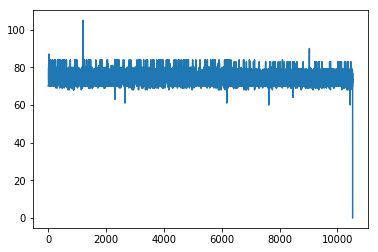

In [194]:
#Gerar gráfico de análise das linhas
plt.plot(preenchimento_linhas)
plt.show()

In [195]:
#Gerar média de preenchimento das linhas

In [196]:
#Verificar quais campos analisar, sendo que os campos com preenchimento perto do número de registros são os melhore.
preenchimento_colunas = df.count(axis='rows')

In [42]:
#Script de criação das tabelas

#Tabela de movimentos do Correio obtidos da fatura mensal - Cabeçalho
create table correio_fatura_tipo_a (
    numero_sequencial_registro varchar(7), 
    codigo_registro varchar(1), 
    mes_fatura varchar(2), 
    ano_fatura varchar(4), 
    numero_fatura varchar(12), 
    numero_contrato varchar(12), 
    numero_centro_custo varchar(9), 
    cnpj varchar(14), 
    codigo_barras varchar(44), 
    filler_a varchar(255)
);

#Tabela de movimentos do Correio obtidos da fatura mensal - Movimentos
create table correio_fatura_tipo_b (
    numero_sequencial_registro varchar(7), 
    codigo_registro varchar(1), 
    mes_fatura varchar(2), 
    ano_fatura varchar(4), 
    numero_lancamento varchar(19), 
    numero_cartao varchar(12), 
    data_postagem varchar(10), 
    descricao_servico varchar(50), 
    numero_documento varchar(20), #Rever para o mesmo tamanho do Completo
    numero_lote varchar(8),
    servico_adicional varchar(8),
    numero_destino varchar(8),
    numero_unidade_postagem varchar(10),
    unidade_postagem varchar(50),
    peso int,
    quantidade int,
    valor_unitario decimal(9,2),
    valor_desconto decimal(9,2),
    valor_liquido decimal(9,2),
    nota_fiscal_cliente varchar(15),
    codigo_servico_ect varchar(5),
    responsavel_cartao varchar(70),
    numero_objeto varchar(13),
    filler_b varchar(11)
);

#Tabela de movimentos do Correio obtidos da fatura mensal - Créditos
create table correio_fatura_tipo_c (
    numero_sequencial_registro varchar(7), 
    codigo_registro varchar(1), 
    mes_fatura varchar(2), 
    ano_fatura varchar(4), 
    numero_lancamento_credito varchar(19), 	
    descricao_credito varchar(100),
    valor_credito_original decimal(9,2), 
    valor_credito_corrigido decimal(9,2), 
    codigo_operacao_ect varchar(3), 
    filler_c varchar(212)
);

#Tabela de movimentos do Correio obtidos da fatura mensal - Débitos
create table correio_fatura_tipo_d (
    numero_sequencial_registro varchar(7), 
    codigo_registro varchar(1), 
    mes_fatura varchar(2), 
    ano_fatura varchar(4), 
    descricao_debito varchar(100), 	
    valor_debito decimal(9,2), 
    codigo_operacao_ect varchar(3), 
    filler_d varchar(240)
);

#Tabela de movimentos do Correio obtidos da fatura mensal - Rodapé
create table correio_fatura_tipo_z (
    numero_sequencial_registro varchar(7), 
    codigo_registro varchar(1), 
    mes_fatura varchar(2), 
    ano_fatura varchar(4), 
    quantidade_tipo_b int,
    quantidade_tipo_c int,
    valor_total_lancamentos_debitos decimal(15,2),  	
    valor_total_creditos_corrigidos decimal(15,2), 
    valor_total_outros_debitos decimal(15,2),  	
    valor_total_outros_creditos decimal(15,2), 
    valor_total_fatura decimal(15,2), 
    filler_z varchar(263)
);



#Tabela de metadados das cargas
create table carga (
    identificador_carga int, 
    conta varchar(50), 
    fonte varchar(1000),
    proprietario varchar(50),
    periodicidade varchar(20),
    periodo varchar(20),
    arquivo varchar(200),
    formato_arquivo varchar(20),
    localizacao_arquivo varchar(50),
    observacoes varchar(500),
    url_extracao varchar(100),
    tipo_banco_dados_extracao varchar(50),
    nome_database varchar(50),
    nome_tabela varchar(100),
    ip_extracao varchar(20),
    porta_extracao varchar(10),
    credenciais varchar(100),
    script_extracao varchar(1000),
    usuario_extracao varchar(100),
    data_extracao datetime,
    usuario_analise_preliminar varchar(100),
    data_analise_preliminar datetime
);
